In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [3]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

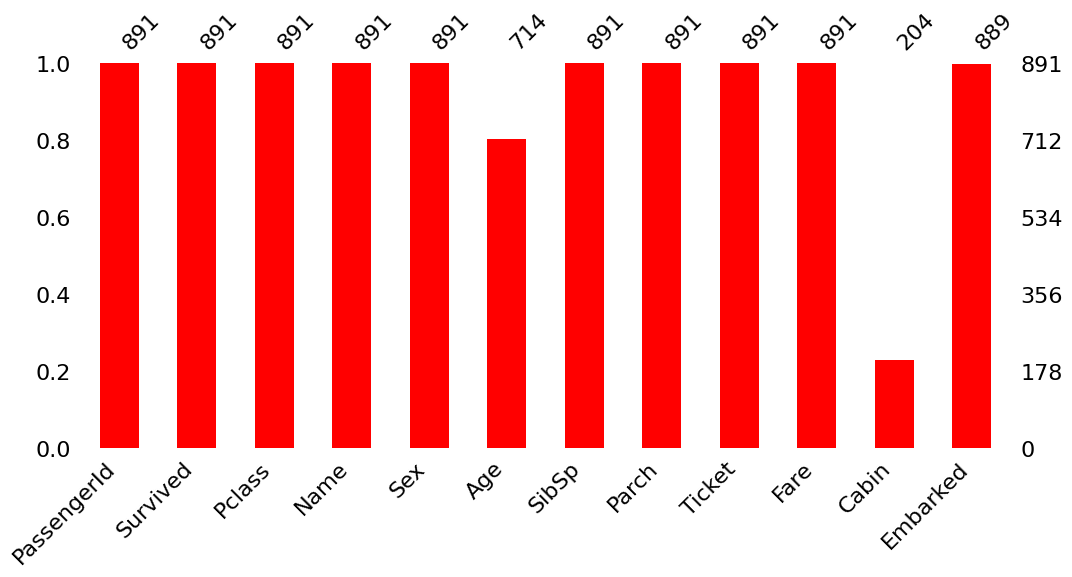

In [7]:
import missingno as msno
msno.bar(train, figsize=(12, 5), color='red')
plt.show()

In [8]:
num_cols = train.select_dtypes(exclude='object')
num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


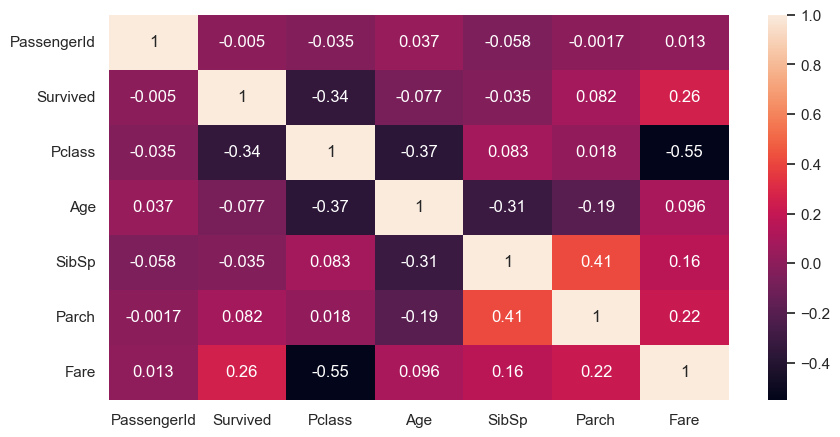

In [9]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(num_cols.corr(), annot=True, cbar=True)
plt.show()

In [10]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data)

     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [11]:
# 가장 먼저 숫자형 데이터를 가진열을 추가하고 data-num 변수에 저장한다.
# fillna() 메소드를 사용하여 'Age'열의 결측값을 평균값으로 대체한다.
# 'Fare'열의 결측값은 가장 빈도수가 많은 값으로 대체한다(최빈값)

# 숫자형 피처 추출
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = data_num.loc[data['TrainSplit']=='Train', selected_feature]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_feature]

print("Train 데이터셋 크기 :", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)
# print(data['TrainSplit'].head())
# print(x_test.head())

Train 데이터셋 크기 : (891, 5) (891,)
Test 데이터셋 크기 : (418, 5)


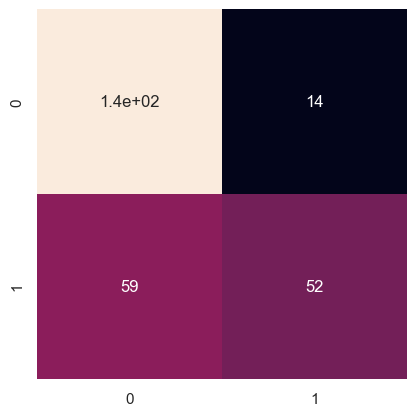

In [12]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False,square=True)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred)) # 정밀도
print("Recall:%.4f" % recall_score(y_val, y_val_pred)) # 재현율
print("F1:%.4f" % f1_score(y_val, y_val_pred)) # 정확도와 재현율의 조화
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred)) # 데이콘 경진대회에서 사용하는 평가지표 1에가까울소록 좋은 모델링

Accuracy:0.7276
Precision:0.7879
Recall:0.4685
F1:0.5876
AUC:0.6896


In [14]:
y_test_pred = lr_model.predict(x_test)

In [15]:
train['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

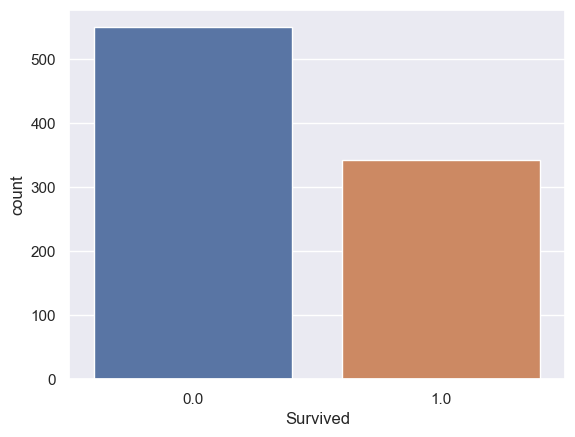

In [16]:
sns.countplot(x='Survived', data=data)
plt.show()

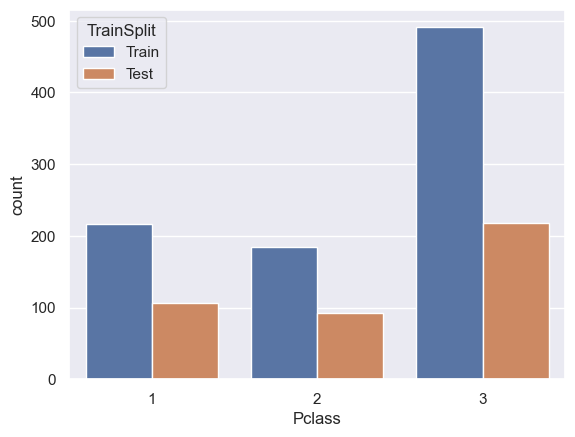

In [17]:
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

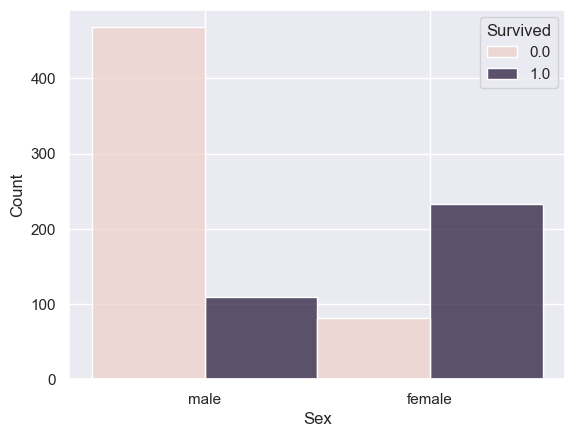

In [18]:
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data)
plt.show()

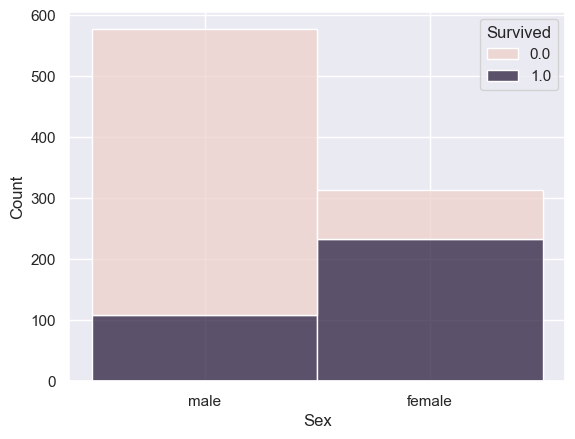

In [19]:
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data)
plt.show()

In [20]:
data['Sex'] = data['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [21]:
data['Sex'].value_counts(dropna=False)

Sex
1    843
0    466
Name: count, dtype: int64

In [22]:
title_name = data['Name'].str.split(",", expand=True)[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [23]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64

In [24]:
title = title.replace(['Ms'], 'Miss', regex=True)
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer', 'Noblea'], 'Noble', regex=True)
title = title.replace(['Col', 'Major', 'Capt'], 'Officer', regex=True)
title = title.replace(['Dr', 'Rev'], 'Priest', regex=True)
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Title
 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Officer      7
 Noblea       1
Name: count, dtype: int64

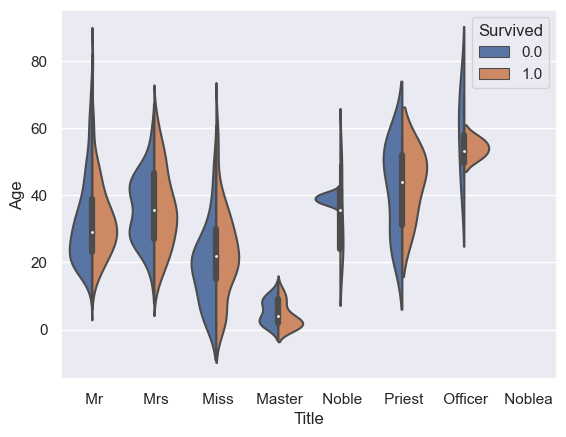

In [25]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [26]:
data = data.drop(['Name'], axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [27]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
    # 결측값 개수 확인
    print("%s 결측값 개수:" % title, data.loc[data['Title']==title, 'Age'].isnull().sum())
    # 각 Title의 중간값으로 대체
    age_med = data.loc[data['Title']==title, 'Age'].median()
    data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)
    # 결측값 처리 여부 확인
print('\n')
print("Age 열의 평균값 개수 :", data['Age'].isnull().sum())

 Mr 결측값 개수: 176
 Mrs 결측값 개수: 27
 Miss 결측값 개수: 51
 Master 결측값 개수: 8
 Noble 결측값 개수: 0
 Priest 결측값 개수: 1
 Officer 결측값 개수: 0
 Noblea 결측값 개수: 0


Age 열의 평균값 개수 : 0


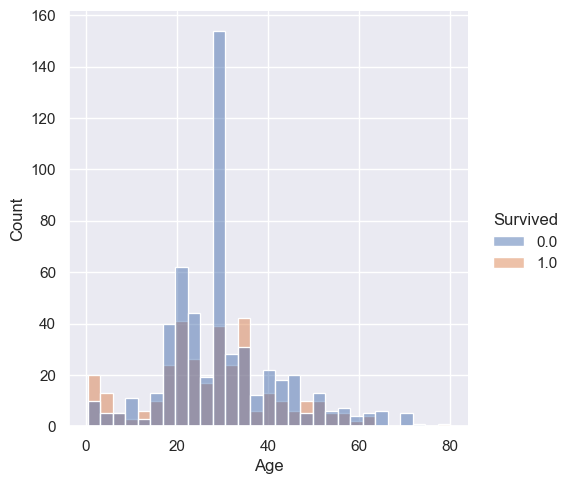

In [28]:
# Age의 분포
sns.displot(x='Age', kind='hist', hue='Survived',
            
            data=data[data['TrainSplit']=='Train'])
plt.show()

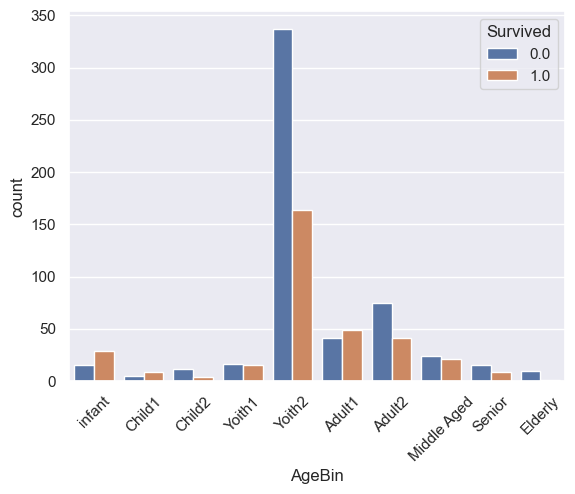

In [29]:
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['infant', 'Child1', 'Child2', 'Yoith1', 'Yoith2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeBin', hue='Survived', data=data)
plt.xticks(rotation=45)
plt.show()

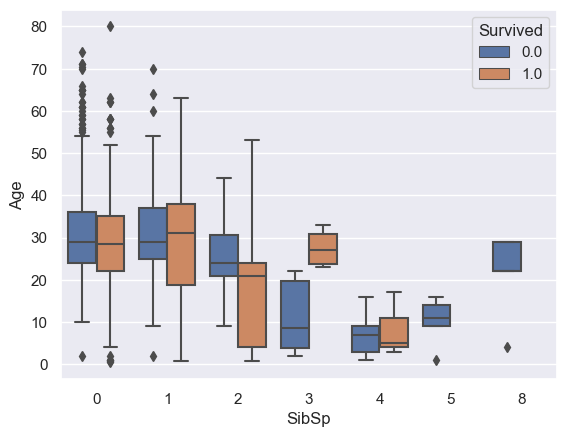

In [30]:
sns.boxplot(x='SibSp', y='Age', hue='Survived',  data=data) 
plt.show()

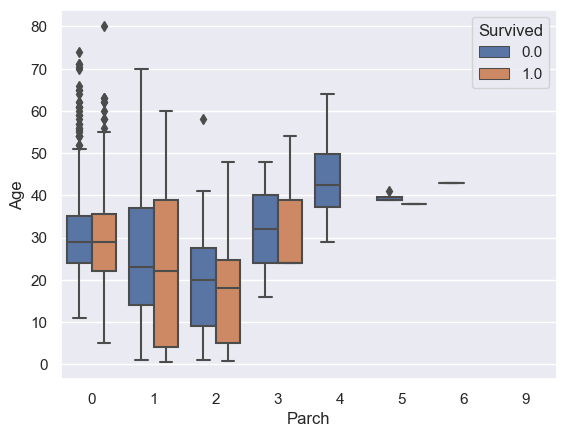

In [31]:
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data)
plt.show()

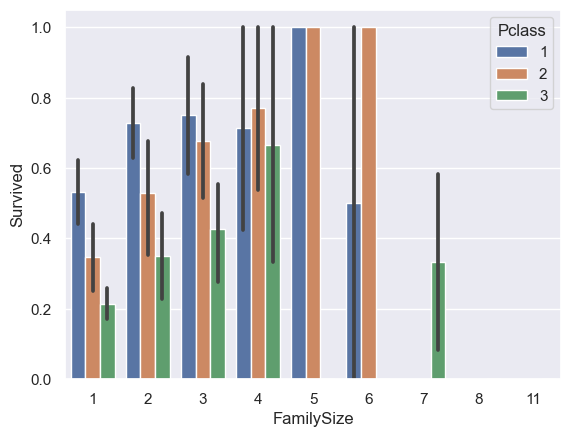

In [32]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', estimator=np.mean, data=data[data['TrainSplit']=='Train'])
plt.show()

In [33]:
data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [34]:
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()

data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


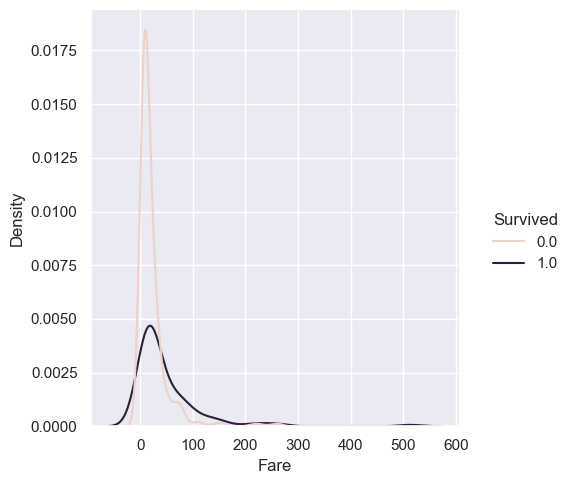

In [35]:
sns.displot(x='Fare', kind='kde', hue='Survived', data=data)
plt.show()

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: FareLog, Length: 1309, dtype: float64


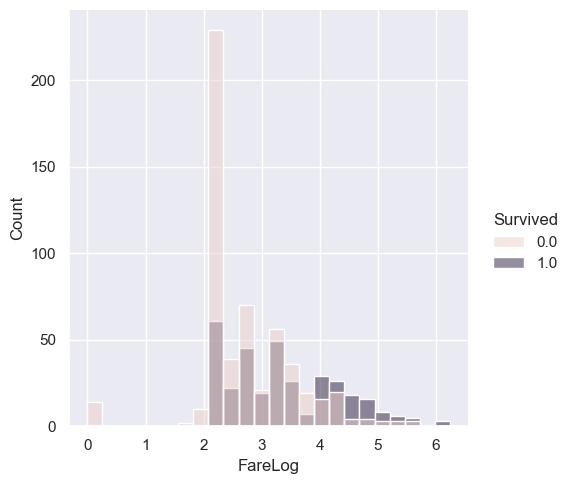

In [36]:
data['FareLog'] = np.log1p(data['Fare'])
print(data['FareLog'])
sns.displot(x='FareLog', kind='hist', hue='Survived', data=data)
plt.show()

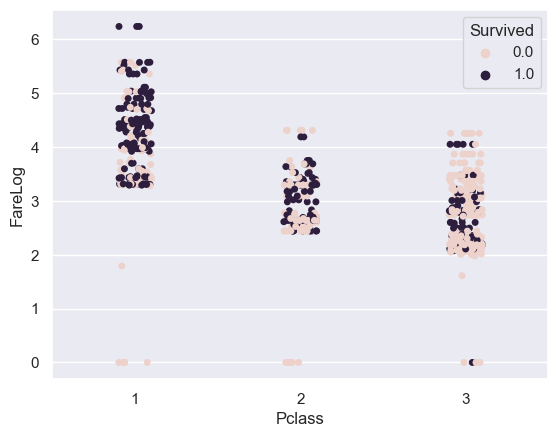

In [37]:
sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data)
plt.show()

In [38]:
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [39]:
print("Embarked 열의 최빈값", data['Embarked'].mode())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Embarked 열의 최빈값 0    S
Name: Embarked, dtype: object


Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

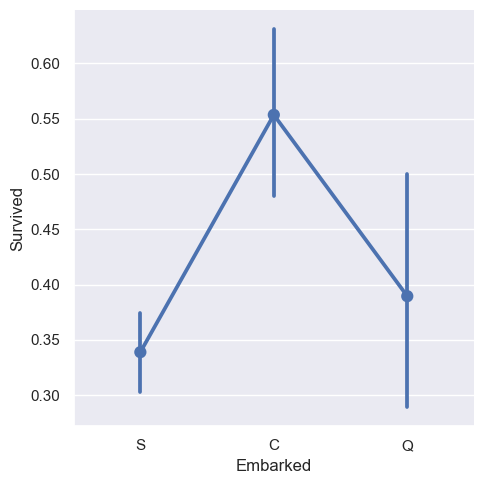

In [40]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=data)
plt.show()

In [41]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [42]:
# 첫 번째 알파벳 이니셜 추출
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

Cabin
NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: count, dtype: int64

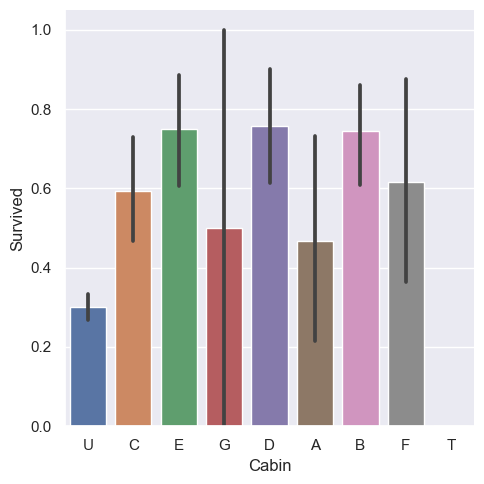

In [43]:
# 알파벳 이니셜로 대체, 결측값은 'U'로 입력
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna("U")

# Cabin 구역별 생존율 비교
sns.catplot(x='Cabin', y='Survived', kind='bar', data=data)
plt.show()

In [44]:
data['Ticket'].value_counts(dropna=False)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [45]:
data['Ticket'] = data['Ticket'].str.replace(",", "").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(" ").str[0]
data['Ticket'].value_counts(dropna=False)

Ticket
PC           92
C.A.         46
SOTONO.Q.    16
W.C.         14
STONO        14
             ..
3460          1
350060        1
239854        1
4134          1
359309        1
Name: count, Length: 753, dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


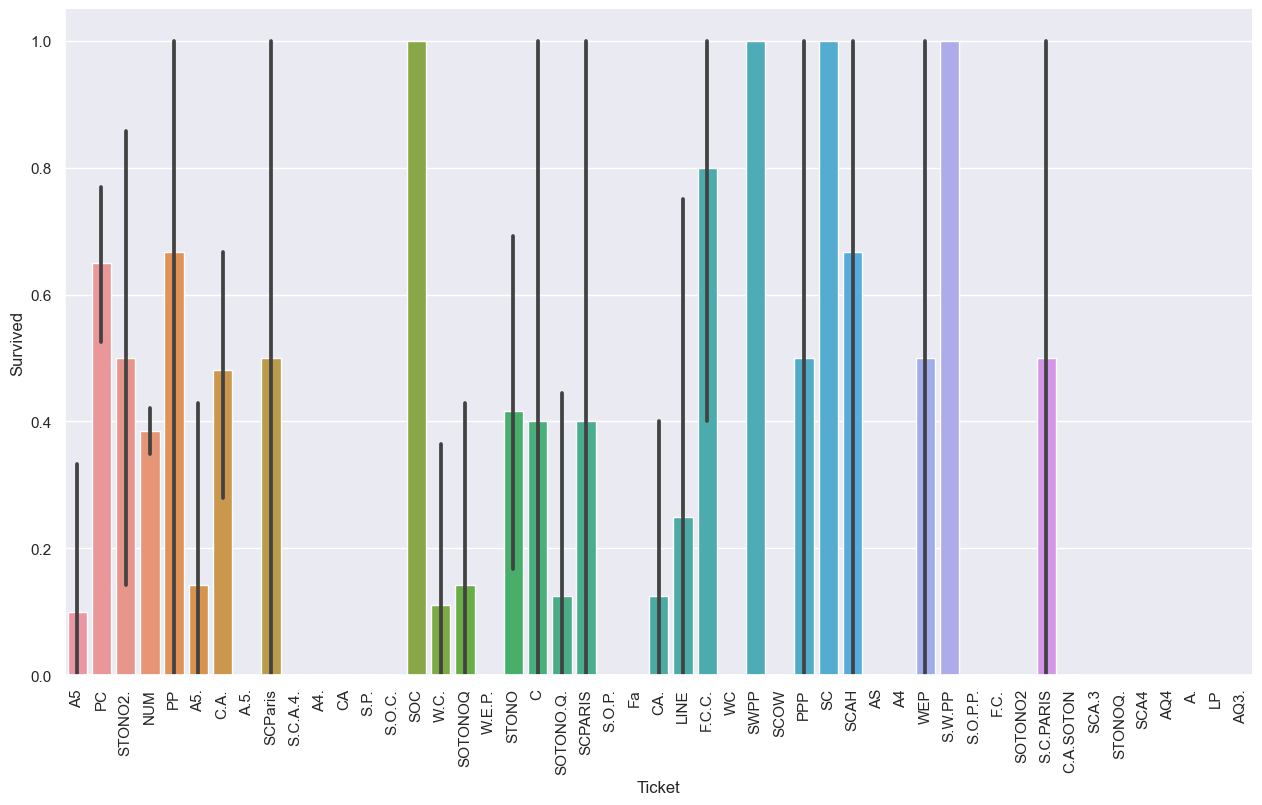

In [46]:
data.loc[data['Ticket'].str.isdigit(), 'Ticket'] = "NUM"
data['Ticket'].value_counts(dropna=False)[:10]
fig = sns.catplot(x='Ticket', y='Survived', kind='bar', data=data)
fig.fig.set_size_inches(15,8)
plt.xticks(rotation=90)
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

data.loc[:, ['Title', 'AgeBin']].head()

,Title,AgeBin
0,2,8
1,3,1
2,1,8
3,3,0
4,2,0


In [48]:
onehot_prefix = []
for col in ['Embarked', 'Cabin', 'Ticket']:
    data[col] = data[col].astype('category')
    data = pd.get_dummies(data, columns=[col], prefix=col[:3], drop_first=True)
    onehot_prefix.append(col[:3])
data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix]].head()

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col != 'TrainSplit'] 
data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

data.loc[:, scaled_cols] = data_scaled[:,:]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,1,0.0,1.0,1,0.273456,0.125,0.0,0.014151,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0,0.473882,0.125,0.0,0.139136,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0,0.323563,0.000,0.0,0.015469,Train,0.142857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0,0.436302,0.125,0.0,0.103644,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1,0.436302,0.000,0.0,0.015713,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
selected_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','TrainSplit','Title','AgeBin','FamilySize','FareLog','Emb_Q','Emb_S','Cab_B',
                    'Cab_C','Cab_D','Cab_E','Cab_F','Cab_G','Cab_T','Cab_U','Tic_A.5.','Tic_A4','Tic_A4.','Tic_A5','Tic_A5.','Tic_AQ3.',
                    'Tic_AQ4','Tic_AS','Tic_C','Tic_C.A.','Tic_C.A.SOTON','Tic_CA','Tic_CA.','Tic_F.C.','Tic_F.C.C.','Tic_Fa','Tic_LINE','Tic_LP',
                    'Tic_NUM','Tic_PC','Tic_PP','Tic_PPP','Tic_S.C.A.4.','Tic_S.C.PARIS','Tic_S.O.C.','Tic_S.O.P.','Tic_S.O.P.P.','Tic_S.P.',
                    'Tic_S.W.PP','Tic_SC','Tic_SCA.3','Tic_SCA4','Tic_SCAH','Tic_SCOW','Tic_SCPARIS',
                    'Tic_SCParis','Tic_SOC','Tic_SOTONO.Q.','Tic_SOTONO2','Tic_SOTONOQ',
                    'Tic_STONO','Tic_STONO2.','Tic_STONOQ.','Tic_SWPP','Tic_W.C.','Tic_W.E.P.','Tic_WC','Tic_WEP']
len(selected_features)

69

In [51]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
print(y_train)
x_train = data.loc[data['TrainSplit']=='Train', selected_features]
x_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train 데이터셋 크기:", x_train.shape, y_train.shape)
print("Test 데이터셋 크기:", x_test.shape)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
Train 데이터셋 크기: (891, 69) (891,)
Test 데이터셋 크기: (418, 69)


In [52]:
x_train = x_train.drop(['TrainSplit'], axis=1)

In [53]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)
print("훈련 데이터셋 크기:", x_tr.shape, y_tr.shape)
print("검증 데이터 셋 크기:", x_val.shape, y_val.shape)

훈련 데이터셋 크기: (712, 68) (712,)
검증 데이터 셋 크기: (179, 68) (179,)


In [54]:
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_tr_pred = lr_model.predict(x_tr)
print("훈련 Accuracy:%.4f" % accuracy_score(y_tr, y_tr_pred))
print("훈련 ACU:%.4f" % roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(x_val)
print("검증 Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

훈련 Accuracy:0.8090
훈련 ACU:0.7884
검증 Accuracy:0.8212
검증 AUC:0.8137


In [55]:
x_test = x_test.drop(['TrainSplit'], axis=1)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수 :", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC 점수 : [0.8462 0.8215 0.8781 0.8539 0.886 ]
평균 AUC 점수 : 0.8571


In [57]:
# test 계열 알고리즘 feature intortance 그래프
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize=(10,12))
    plt.title("Feature impotance")
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel("Relative Importance")

    print("피처:", list(reversed(feature_names)))
    print("중요도:", list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

In [63]:
rf_model = rf_model.fit(x_train, y_train)

피처: ['Sex', 'Age', 'Fare', 'FamilySize', 'TrainSplit', 'Pclass', 'Title', 'AgeBin', 'SibSp', 'Cab_T', 'Parch', 'Emb_Q', 'Tic_LP', 'FareLog', 'Emb_S', 'Cab_D', 'Tic_NUM', 'Cab_C', 'Cab_B', 'Tic_SOTONOQ', 'Tic_SWPP', 'Tic_A5', 'Tic_S.P.', 'Tic_STONOQ.', 'Tic_C', 'Tic_AS', 'Tic_CA', 'Tic_SOC', 'Cab_E', 'Cab_F', 'Tic_A4.', 'Tic_STONO', 'Tic_C.A.SOTON', 'Tic_SOTONO2', 'Tic_SCOW', 'Tic_S.O.P.', 'Tic_F.C.', 'Tic_Fa', 'Tic_S.C.PARIS', 'Tic_WC', 'Tic_SCA4', 'Tic_A4', 'Tic_W.C.', 'Tic_S.C.A.4.', 'Tic_CA.', 'Tic_PC', 'Tic_SCPARIS', 'Cab_G', 'Tic_PP', 'Tic_SCParis', 'Cab_U', 'Tic_A.5.', 'Tic_S.W.PP', 'Tic_S.O.P.P.', 'Tic_S.O.C.', 'Tic_SOTONO.Q.', 'Tic_AQ4', 'Tic_W.E.P.', 'Tic_C.A.', 'Tic_F.C.C.', 'Tic_SCAH', 'Tic_PPP', 'Tic_AQ3.', 'Tic_SC', 'Tic_SCA.3', 'Tic_LINE', 'Tic_STONO2.', 'Tic_A5.']
중요도: [0.160478970221138, 0.15331591257864066, 0.1271816206119323, 0.11255603548719398, 0.10718891024181439, 0.05106055004974262, 0.047996305314280466, 0.0413703785317603, 0.02988940913859155, 0.0277547512123064

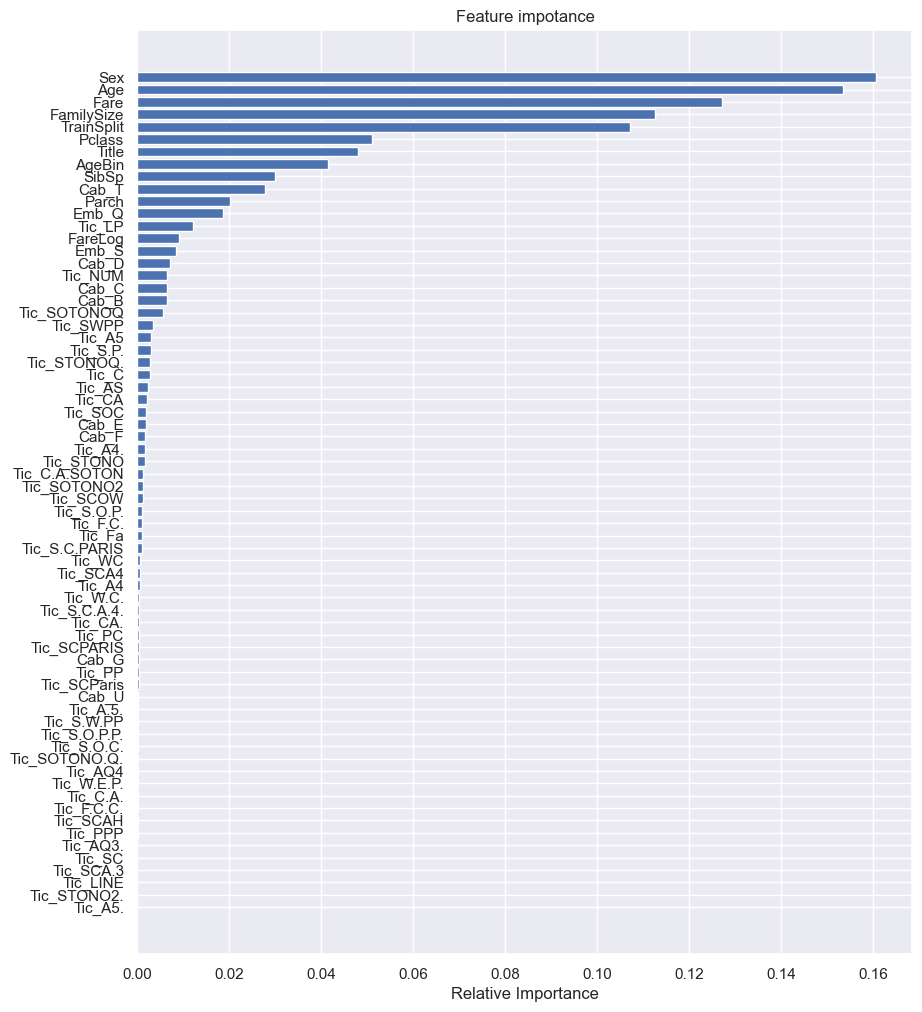

In [64]:
imp_features, imp_scores = plot_importance(rf_model, selected_features)